In [1]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
list_of_census = [
    "EW_1851",
    "EW_1861",
    "EW_1881",
    "EW_1891",
    "EW_1901",
    "EW_1911",
    "SCOT_1851",
    "SCOT_1861",
    "SCOT_1871",
    "SCOT_1881",
    "SCOT_1891",
    "SCOT_1901",
]
# list_of_census = ["EW_1901"]
# list_of_census = ["SCOT_1901"]

# list_of_census = [
#     "EW_1851",
#     "EW_1861",
#     "EW_1881",
#     "EW_1891",
#     "EW_1901",
#     "EW_1911"
# ]

# list_of_census = [
# "SCOT_1851",
# "SCOT_1861",
# "SCOT_1871",
# "SCOT_1881",
# "SCOT_1891",
# "SCOT_1901"
# ]

list_of_geoms = ["os_open_roads", "gb1900"]



In [3]:
# combine linked files with lkups iterating over census years, geoms, and partitions (combining all partitions into one file)
for census in list_of_census:
	country = census.split("_")[0]
	year = census.split("_")[1]
	for geom in list_of_geoms:
		merged_list = []
		geom_output_dir = pathlib.Path(f"output/{year}/{country}/{geom}/linked")
		for file_p in geom_output_dir.iterdir():
			partition = file_p.name.split("_")[0]
			linked_partion = pd.read_csv(file_p, sep="\t", usecols=["unique_add_id", f"{geom}_{country}_{year}", "rapidfuzzy_wratio_s"])
			lkup = pd.read_csv(f"output/{year}/{country}/{country}_{year}_{partition}_lkup.tsv", sep="\t")
			merged = pd.merge(left = lkup, right = linked_partion, on = "unique_add_id", how = "left")
			merged_list.append(merged)
		merged_all = pd.concat(merged_list)
		output_dir = pathlib.Path(f"analysis/{year}/{country}/{geom}")
		output_dir.mkdir(parents=True, exist_ok=True)
		merged_all.to_csv(output_dir / f"{geom}_link_lkup_merge.tsv", sep = "\t", index = False)


In [5]:
merged_all

,RecID,unique_add_id,gb1900_SCOT_1901
0,4221694,DRYDEN FARM HOUSE_757,5815f8be2c66dc38490147ac_757
1,4221695,DRYDEN FARM HOUSE_757,5815f8be2c66dc38490147ac_757
2,4221696,DRYDEN FARM HOUSE_757,5815f8be2c66dc38490147ac_757
3,4221697,DRYDEN FARM HOUSE_757,5815f8be2c66dc38490147ac_757
4,4221698,DRYDEN FARM HOUSE_757,5815f8be2c66dc38490147ac_757
...,...,...,...
111017,1633689,WHISTLEFIELD INN OR HOTEL_500,581271332c66dc5b15004723_500
111018,1633690,WHISTLEFIELD INN OR HOTEL_500,581271332c66dc5b15004723_500
111019,1633691,WHISTLEFIELD_500,NaN
111020,1633692,HERMITAGE_500,58b454352c66dc81190f9957_500


In [3]:
# iterate over census years, then iterarate over each combined geometry output and combine the geometry outputs into one df;
# write the dfs to a file
for census in list_of_census:
	country = census.split("_")[0]
	year = census.split("_")[1]
	print(year, country)

	for iteration, geom in enumerate(list_of_geoms):
		merged_output_dir = f"analysis/{year}/{country}/{geom}/{geom}_link_lkup_merge.tsv"
		# merged = pd.read_csv(merged_output_dir, sep = "\t", usecols = ["RecID", f"{geom}_{country}_{year}"])
		merged = pd.read_csv(merged_output_dir, sep = "\t")
		if iteration == 0:
			merged_geom = merged
		else:
			merged_geom = pd.merge(left = merged_geom, right = merged, on = "RecID", how = "left")


	merged_geom["geocode"] = np.where(((merged_geom[f"gb1900_{country}_{year}"].isna()) & (merged_geom[f"os_open_roads_{country}_{year}"].isna())), "not_linked", 
							np.where(((merged_geom[f"gb1900_{country}_{year}"].isna() == False) & (merged_geom[f"os_open_roads_{country}_{year}"].isna() == False)), "both", 
							np.where(((merged_geom[f"gb1900_{country}_{year}"].isna() == False) & (merged_geom[f"os_open_roads_{country}_{year}"].isna())), "gb1900", 
							"os_open_roads")))






	merged_geom.to_csv(f"analysis/{year}/{country}/link_lkup_merged_geoms.tsv", sep = "\t", index = False)
	# print(merged_geom)




1851 EW
1861 EW
1881 EW
1891 EW
1901 EW
1911 EW
1851 SCOT
1861 SCOT
1871 SCOT
1881 SCOT
1891 SCOT
1901 SCOT


In [8]:
merged_geom["geocode"].value_counts(dropna=False, normalize=True)

both             0.400548
os_open_roads    0.210525
gb1900           0.196077
not_linked       0.192850
Name: geocode, dtype: float64

In [7]:
census_csv_params = {
	"sep": "\t",
	"encoding": "latin-1",
	"quoting": 3,
	"na_values": [".", " "],
	"usecols": ["RecID", "Age", "Sex", "Occode", "ParID", "Servts", "Country"], #add other columns from census here
	# "nrows":10000
}

# list_of_census = [
#     "EW_1851",
#     "EW_1861",
#     "EW_1881",
#     "EW_1891",
#     "EW_1901",
#     "EW_1911"
# ]

list_of_census = [
    "SCOT_1851",
    "SCOT_1861",
    "SCOT_1871",
    "SCOT_1881",
    "SCOT_1891",
    "SCOT_1901"
]

analysis_list = []

for census in list_of_census:
	country = census.split("_")[0]
	year = census.split("_")[1]
	print(year)

	if country == "EW" and year in ["1851", "1861"]:
		suffix = "_v1"
	else:
		suffix = ""

	full_census = pd.read_csv(f"/Users/wknq25/Documents/icem/{country}{str(year)[-2:]}outputfile{suffix}.txt",**census_csv_params)
	print(full_census)
	geocode_output = pd.read_csv(f"analysis/{year}/{country}/link_lkup_merged_geoms.tsv", sep = "\t", usecols = ["RecID", "geocode"])

	geocode_census = pd.merge(left= full_census, right = geocode_output, on = "RecID", how = "left", validate="one_to_one")
	geocode_census["country"] = country
	geocode_census["year"] = year

	# print(geocode_census.info())

	analysis_list.append(geocode_census)

combined = pd.concat(analysis_list)
combined.to_csv(f"analysis/SCOT_all_years.tsv", sep = "\t", index = False)


1851
           RecID   ParID Country Sex   Age  Occode  Servts
0              2  100001     SCT   M  47.0     NaN     1.0
1              3  100001     SCT   F  46.0     NaN     1.0
2              4  100001     SCT   M  20.0     NaN     1.0
3              5  100001     SCT   M  15.0     NaN     1.0
4              6  100001     SCT   F  13.0     NaN     1.0
...          ...     ...     ...  ..   ...     ...     ...
2899276  2899278  101014     SCT   F  41.0     NaN     0.0
2899277  2899279  101014     SCT   M  54.0     NaN     0.0
2899278  2899280  101014     SCT   F  50.0     NaN     0.0
2899279  2899281  101014     SCT   F  20.0     NaN     0.0
2899280  2899282  101014     SCT   F  13.0     NaN     0.0

[2899281 rows x 7 columns]
1861
           RecID   ParID Country Sex   Age  Occode  Servts
0            289  100001     SCT   M  70.0   774.0     0.0
1            290  100001     SCT   F  68.0   788.0     0.0
2            291  100001     SCT   F  40.0   181.0     0.0
3            292  

In [4]:
geocode_census = pd.read_csv("analysis/SCOT_all_years.tsv", sep = "\t")
geocode_census["geocode_binary"] = np.where(geocode_census["geocode"] == "not_linked", "not_linked", "linked")
# geocode_census["geocode_binary"].value_counts()

In [58]:
# Add other variables

geocode_census["Age_cut"] = pd.cut(geocode_census["Age"], bins = [0,10,20,30,40,50,60,70,80,np.inf], labels = ["Under 10", "10-20", "20-30","30-40", "40-50","50-60", "60-70","70-80", "Over 80"])
geocode_census[geocode_census["Age"] < 10]

,RecID,ParID,Country,Sex,Age,Occode,Servts,geocode,country,year,geocode_binary,Age_cut
6,8,100001,SCT,F,9.00,NaN,1.0,not_linked,SCOT,1851,not_linked,Under 10
7,9,100001,SCT,F,7.00,NaN,1.0,not_linked,SCOT,1851,not_linked,Under 10
8,10,100001,SCT,M,5.00,NaN,1.0,not_linked,SCOT,1851,not_linked,Under 10
9,11,100001,SCT,F,3.00,NaN,1.0,not_linked,SCOT,1851,not_linked,Under 10
13,15,100001,SCT,M,8.00,NaN,1.0,not_linked,SCOT,1851,not_linked,Under 10
...,...,...,...,...,...,...,...,...,...,...,...,...
21450742,4438418,100882,SCT,F,0.25,999.0,0.0,gb1900,SCOT,1901,linked,Under 10
21450749,4438425,100882,SCT,M,9.00,787.0,2.0,gb1900,SCOT,1901,linked,Under 10
21450750,4438426,100882,SCT,F,7.00,787.0,2.0,gb1900,SCOT,1901,linked,Under 10
21450751,4438427,100882,SCT,M,5.00,787.0,2.0,gb1900,SCOT,1901,linked,Under 10


In [59]:
geocode_grouped_age = geocode_census.groupby(["year", "geocode_binary", "Age_cut"]).size()
g_graph_age = (geocode_grouped_age / geocode_grouped_age.groupby(["year", "geocode_binary"]).transform("sum") * 100)
trial_age = g_graph_age.unstack(level=1)

trial_age= trial_age.rename_axis(None, axis=1).reset_index()
trial_age
# geocode_grouped_age.to_csv("age_check.tsv", sep = "\t")

,year,Age_cut,linked,not_linked
0,1851,Under 10,26.743205,27.684745
1,1851,10-20,21.361514,21.135049
2,1851,20-30,17.920553,16.650236
3,1851,30-40,12.304777,11.889195
4,1851,40-50,9.164128,9.183328
5,1851,50-60,6.287748,6.610605
6,1851,60-70,3.836010,4.093936
7,1851,70-80,1.881297,2.143936
8,1851,Over 80,0.500767,0.608970
9,1861,Under 10,27.572381,28.521204


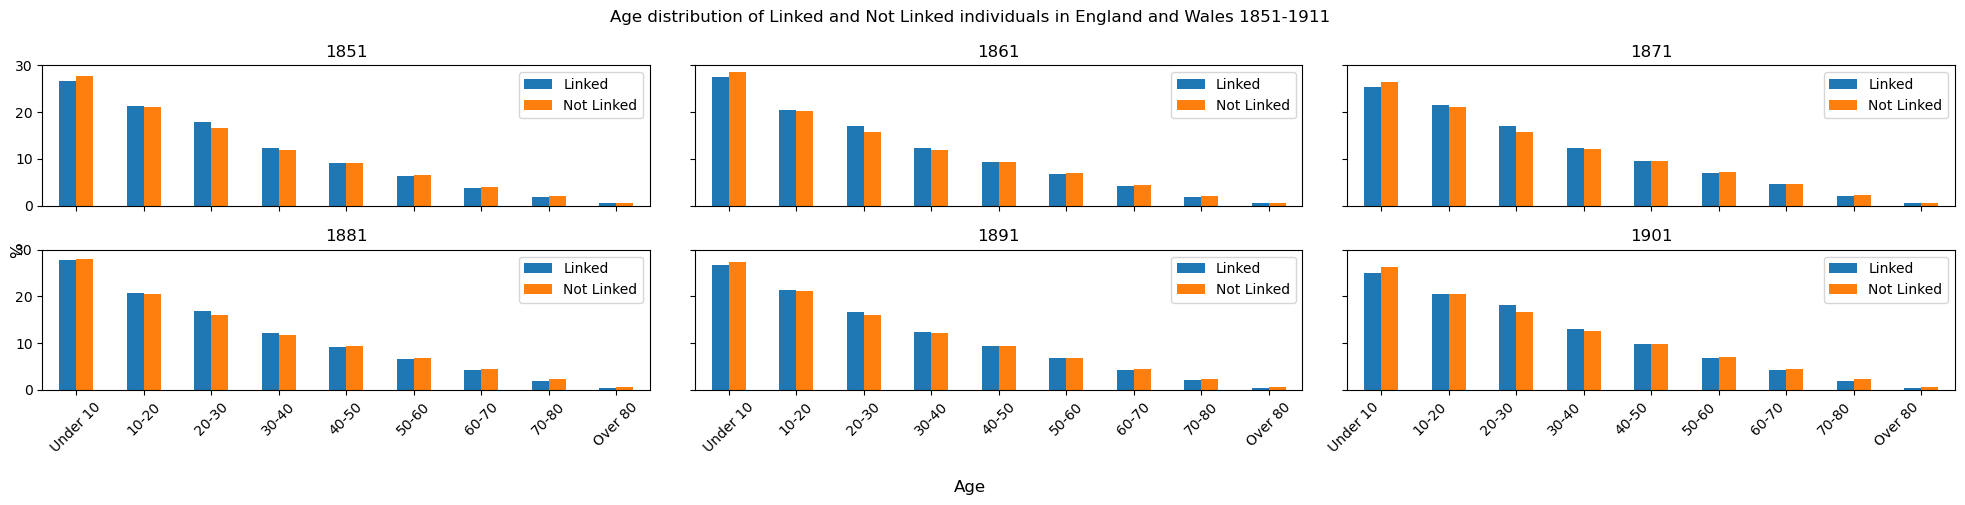

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True,figsize=(20, 5))

fig.suptitle("Age distribution of Linked and Not Linked individuals in England and Wales 1851-1911")


y_ticks = [0,10,20,30]
marker = "o"
ylabel = "%"
xlabel = "Age"
rotation = 45
for iter, census_year in enumerate([1851,1861,1871,1881,1891,1901]):
    if iter < 3:
        nrow = 0
        ncol = iter
    else:
        nrow = 1
        ncol = iter - 3
    subset = trial_age[trial_age["year"] == census_year]
    plt.xticks(rotation=45, ha='right')
    age_graph = subset.plot(ax=axes[nrow,ncol], x="Age_cut", y=["linked","not_linked"], title = census_year, yticks=y_ticks, rot=rotation, kind="bar")
    age_graph.legend(labels=["Linked", "Not Linked"])
    age_graph.set(xlabel=None)

plt.tight_layout()
fig.supxlabel('Age')
fig.supylabel('%')


In [5]:
# Sex
geocode_grouped_sex = geocode_census.groupby(["year", "geocode_binary", "Sex"]).size()
g_graph_sex = (geocode_grouped_sex / geocode_grouped_sex.groupby(["year", "geocode_binary"]).transform("sum") * 100)
trial_sex = g_graph_sex.unstack(level=1)

trial_sex= trial_sex.rename_axis(None, axis=1).reset_index()
trial_sex

,year,Sex,linked,not_linked
0,1851,F,52.677763,52.032864
1,1851,M,47.321942,47.966559
2,1851,U,0.000295,0.000577
3,1861,F,52.880369,52.033058
4,1861,M,47.107277,47.949213
5,1861,U,0.012354,0.017729
6,1871,F,52.541499,51.950083
7,1871,M,47.457717,48.038584
8,1871,U,0.000784,0.011333
9,1881,F,51.944283,51.206320


In [9]:
geocode_census["yr_parid"] = geocode_census["year"].astype(str) + "_" + geocode_census["ParID"].astype(str)
geocode_census

,RecID,ParID,Country,Sex,Age,Occode,Servts,geocode,country,year,yr_parid
0,1,100001,SCT,M,81.0,774.0,0.0,gb1900,SCOT,1871,1871_100001
1,2,100001,SCT,F,78.0,NaN,0.0,gb1900,SCOT,1871,1871_100001
2,3,100001,SCT,F,53.0,181.0,0.0,gb1900,SCOT,1871,1871_100001
3,4,100001,SCT,F,45.0,181.0,0.0,gb1900,SCOT,1871,1871_100001
4,5,100001,SCT,M,8.0,787.0,0.0,gb1900,SCOT,1871,1871_100001
...,...,...,...,...,...,...,...,...,...,...,...
15542653,4438427,100882,SCT,M,5.0,787.0,2.0,gb1900,SCOT,1901,1901_100882
15542654,4438428,100882,SCT,F,1.0,999.0,2.0,gb1900,SCOT,1901,1901_100882
15542655,4438429,100882,SCT,F,70.0,659.0,0.0,gb1900,SCOT,1901,1901_100882
15542656,4438430,100882,SCT,F,19.0,101.0,0.0,gb1900,SCOT,1901,1901_100882


In [9]:
geocode_grouped = geocode_census.groupby(["year", "geocode"]).size()
g_graph = (geocode_grouped / geocode_grouped.groupby("year").transform("sum") * 100)
g_graph.info()

<class 'pandas.core.series.Series'>
MultiIndex: 24 entries, (1851, 'both') to (1901, 'os_open_roads')
Series name: None
Non-Null Count  Dtype  
--------------  -----  
24 non-null     float64
dtypes: float64(1)
memory usage: 429.0+ bytes


In [10]:
trial = g_graph.unstack()
trial["total_linked"] = 100 - trial["not_linked"]
trial= trial.rename_axis(None, axis=1)
trial

,both,gb1900,not_linked,os_open_roads,total_linked
year,,,,,
1851,25.303695,27.925673,30.964339,15.806293,69.035661
1861,27.431716,26.220185,29.832469,16.515629,70.167531
1871,28.987544,24.700577,28.184682,18.127197,71.815318
1881,31.197834,23.710270,27.480937,17.610959,72.519063
1891,35.364489,21.167415,24.731359,18.736738,75.268641
1901,40.054776,19.607724,19.284998,21.052502,80.715002


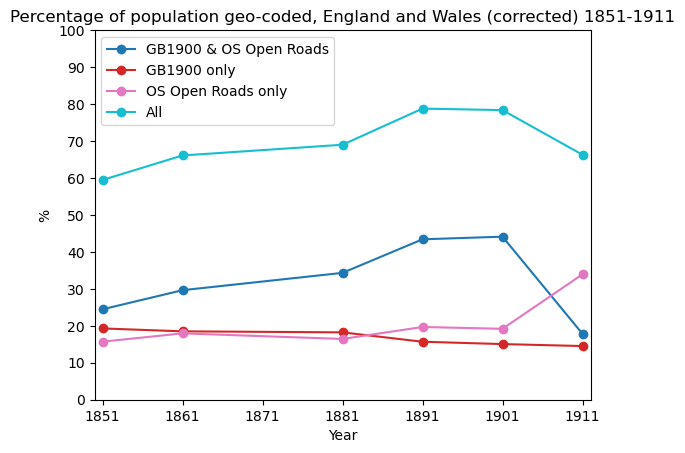

In [9]:
graph_title = "Percentage of population geo-coded, England and Wales (corrected) 1851-1911"
y_min = 0
y_max = 100
y_ticks = [0,10,20,30,40,50,60,70,80,90,100]
x_min = 1850
x_max = 1912
x_ticks = [1851,1861,1871,1881,1891,1901,1911]
marker = "o"
ylabel = "%"
xlabel = "Year"
this = trial.drop("not_linked",axis=1).plot(title=graph_title, ylim=(y_min,y_max),
                                        yticks=y_ticks,
                                        xlim=(x_min,x_max),
                                        xticks=x_ticks,
                                        marker=marker,
                                        ylabel=ylabel,
                                        xlabel=xlabel,
                                        colormap="tab10")
# plt.legend(labels=["GB1900 & OS Open Roads", "GB1900 only", "OS Open Roads only", "All"])
this.legend(labels=["GB1900 & OS Open Roads", "GB1900 only", "OS Open Roads only", "All"])

In [19]:
g_graph = g_graph.reset_index().rename(columns={0:"perc"})
g_graph

,year,geocode,perc
0,1851,both,25.303695
1,1851,gb1900,27.925673
2,1851,not_linked,30.964339
3,1851,os_open_roads,15.806293
4,1861,both,27.431716
5,1861,gb1900,26.220185
6,1861,not_linked,29.832469
7,1861,os_open_roads,16.515629
8,1871,both,28.987544
9,1871,gb1900,24.700577


In [30]:
trial = g_graph.query('geocode == "not_linked"')[["perc"]]
100 - trial

,perc
2,69.035661
6,70.167531
10,71.815318
14,72.519063
18,75.268641
22,80.715002


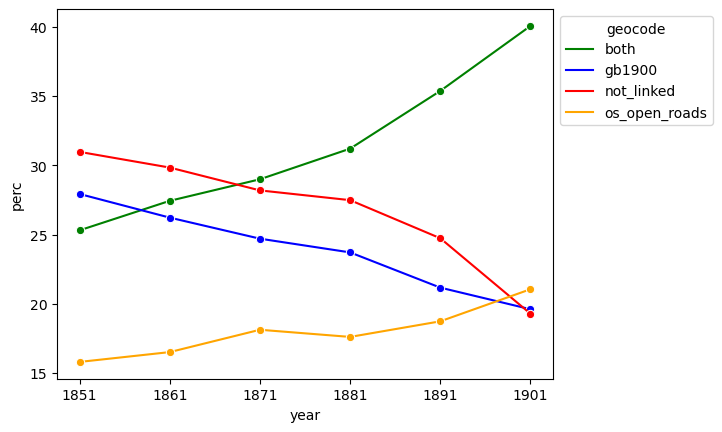

In [9]:
g = sns.lineplot(g_graph, x="year", y = "perc", hue="geocode", marker="o", palette=["green","blue","red","orange"])
# g.set_xticks([1851,1861,1871,1881,1891,1901,1911])
# g.set_xticklabels([1851,1861,1871,1881,1891,1901,1911])
g.set_xticks([1851, 1861, 1871, 1881,1891,1901])
g.set_xticklabels([1851, 1861, 1871, 1881,1891,1901])
sns.move_legend(g, "upper left", bbox_to_anchor = (1,1))

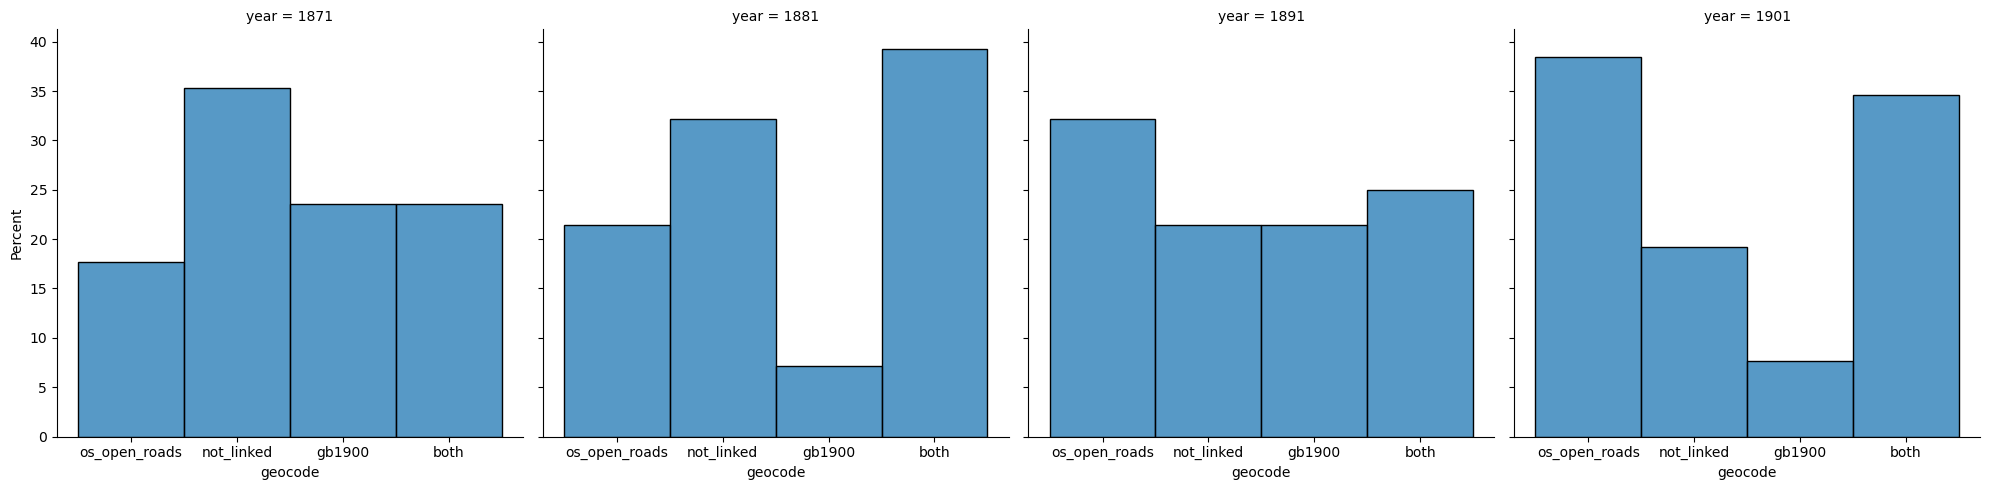

In [14]:
sns.displot(data=geocode_census.sample(100), x="geocode", stat = "percent", col="year", common_norm = False)

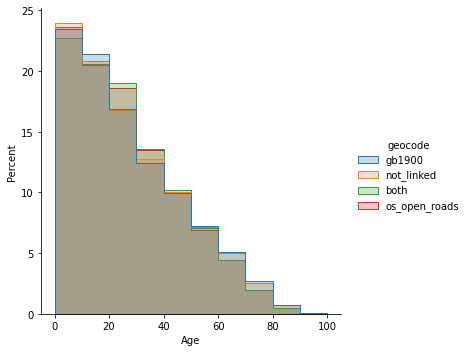

In [12]:
sns.displot(data=geocode_census, x="Age", hue="geocode", element= "step", stat = "percent", common_norm = False, bins = [0,10,20,30,40,50,60,70,80,90,100])

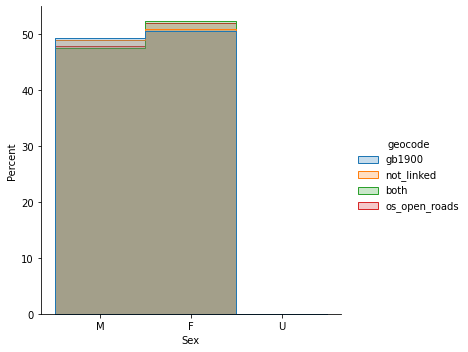

In [13]:
sns.displot(data=geocode_census, x="Sex", hue="geocode", element= "step", stat = "percent", common_norm = False)

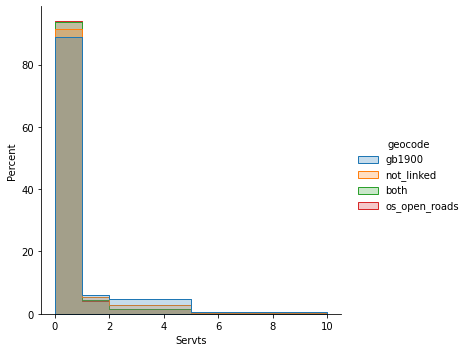

In [15]:
sns.displot(data=geocode_census, x="Servts", hue="geocode", element= "step", stat = "percent", common_norm = False, bins = [0, 1, 2, 5, 10])

In [74]:
list_of_cols = ['ParID','Urban_Class','TOWN']
for year in [1851,1861,1881,1891,1901,1911]:
	urban_classification = pd.read_excel('/Users/jrhodes/Downloads/England_Wales_Urban_Classification_1851_1911.xlsx',sheet_name=f"{year}",usecols=list_of_cols)

	urban_classification["yr_parid"] = f"{year}_" + urban_classification["ParID"].astype(str)
	# print(urban_classification)
	urban_classification_dict = dict(zip(urban_classification['yr_parid'],urban_classification['Urban_Class']))

	geocode_census['urban_class'] = geocode_census['yr_parid'].map(urban_classification_dict).fillna(geocode_census["urban_class"])
geocode_census["urban_class"] = geocode_census["urban_class"].map({1:"urban", 2:"urban_transition", 3:"rural_transition", 4:"rural"})

In [154]:
geocode_grouped_geog = geocode_census.groupby(["year", "geocode", "urban_class"]).size()
g_graph_geog = (geocode_grouped_geog / geocode_grouped_geog.groupby(["year","urban_class"]).transform("sum") * 100)
g_graph_geog = g_graph_geog.reset_index().rename(columns={0:"perc"})

In [155]:
g_graph_geog["urban_class"] = pd.Categorical(g_graph_geog["urban_class"],categories=["urban","urban_transition","rural_transition","rural"])
print(g_graph_geog)

    year        geocode       urban_class       perc
0   1851           both             rural  12.941714
1   1851           both  rural_transition  24.129381
2   1851           both             urban  32.022271
3   1851           both  urban_transition  18.629248
4   1851         gb1900             rural  27.567991
..   ...            ...               ...        ...
91  1911     not_linked  urban_transition  43.520694
92  1911  os_open_roads             rural  27.122645
93  1911  os_open_roads  rural_transition  35.188947
94  1911  os_open_roads             urban  34.764487
95  1911  os_open_roads  urban_transition  32.371545

[96 rows x 4 columns]


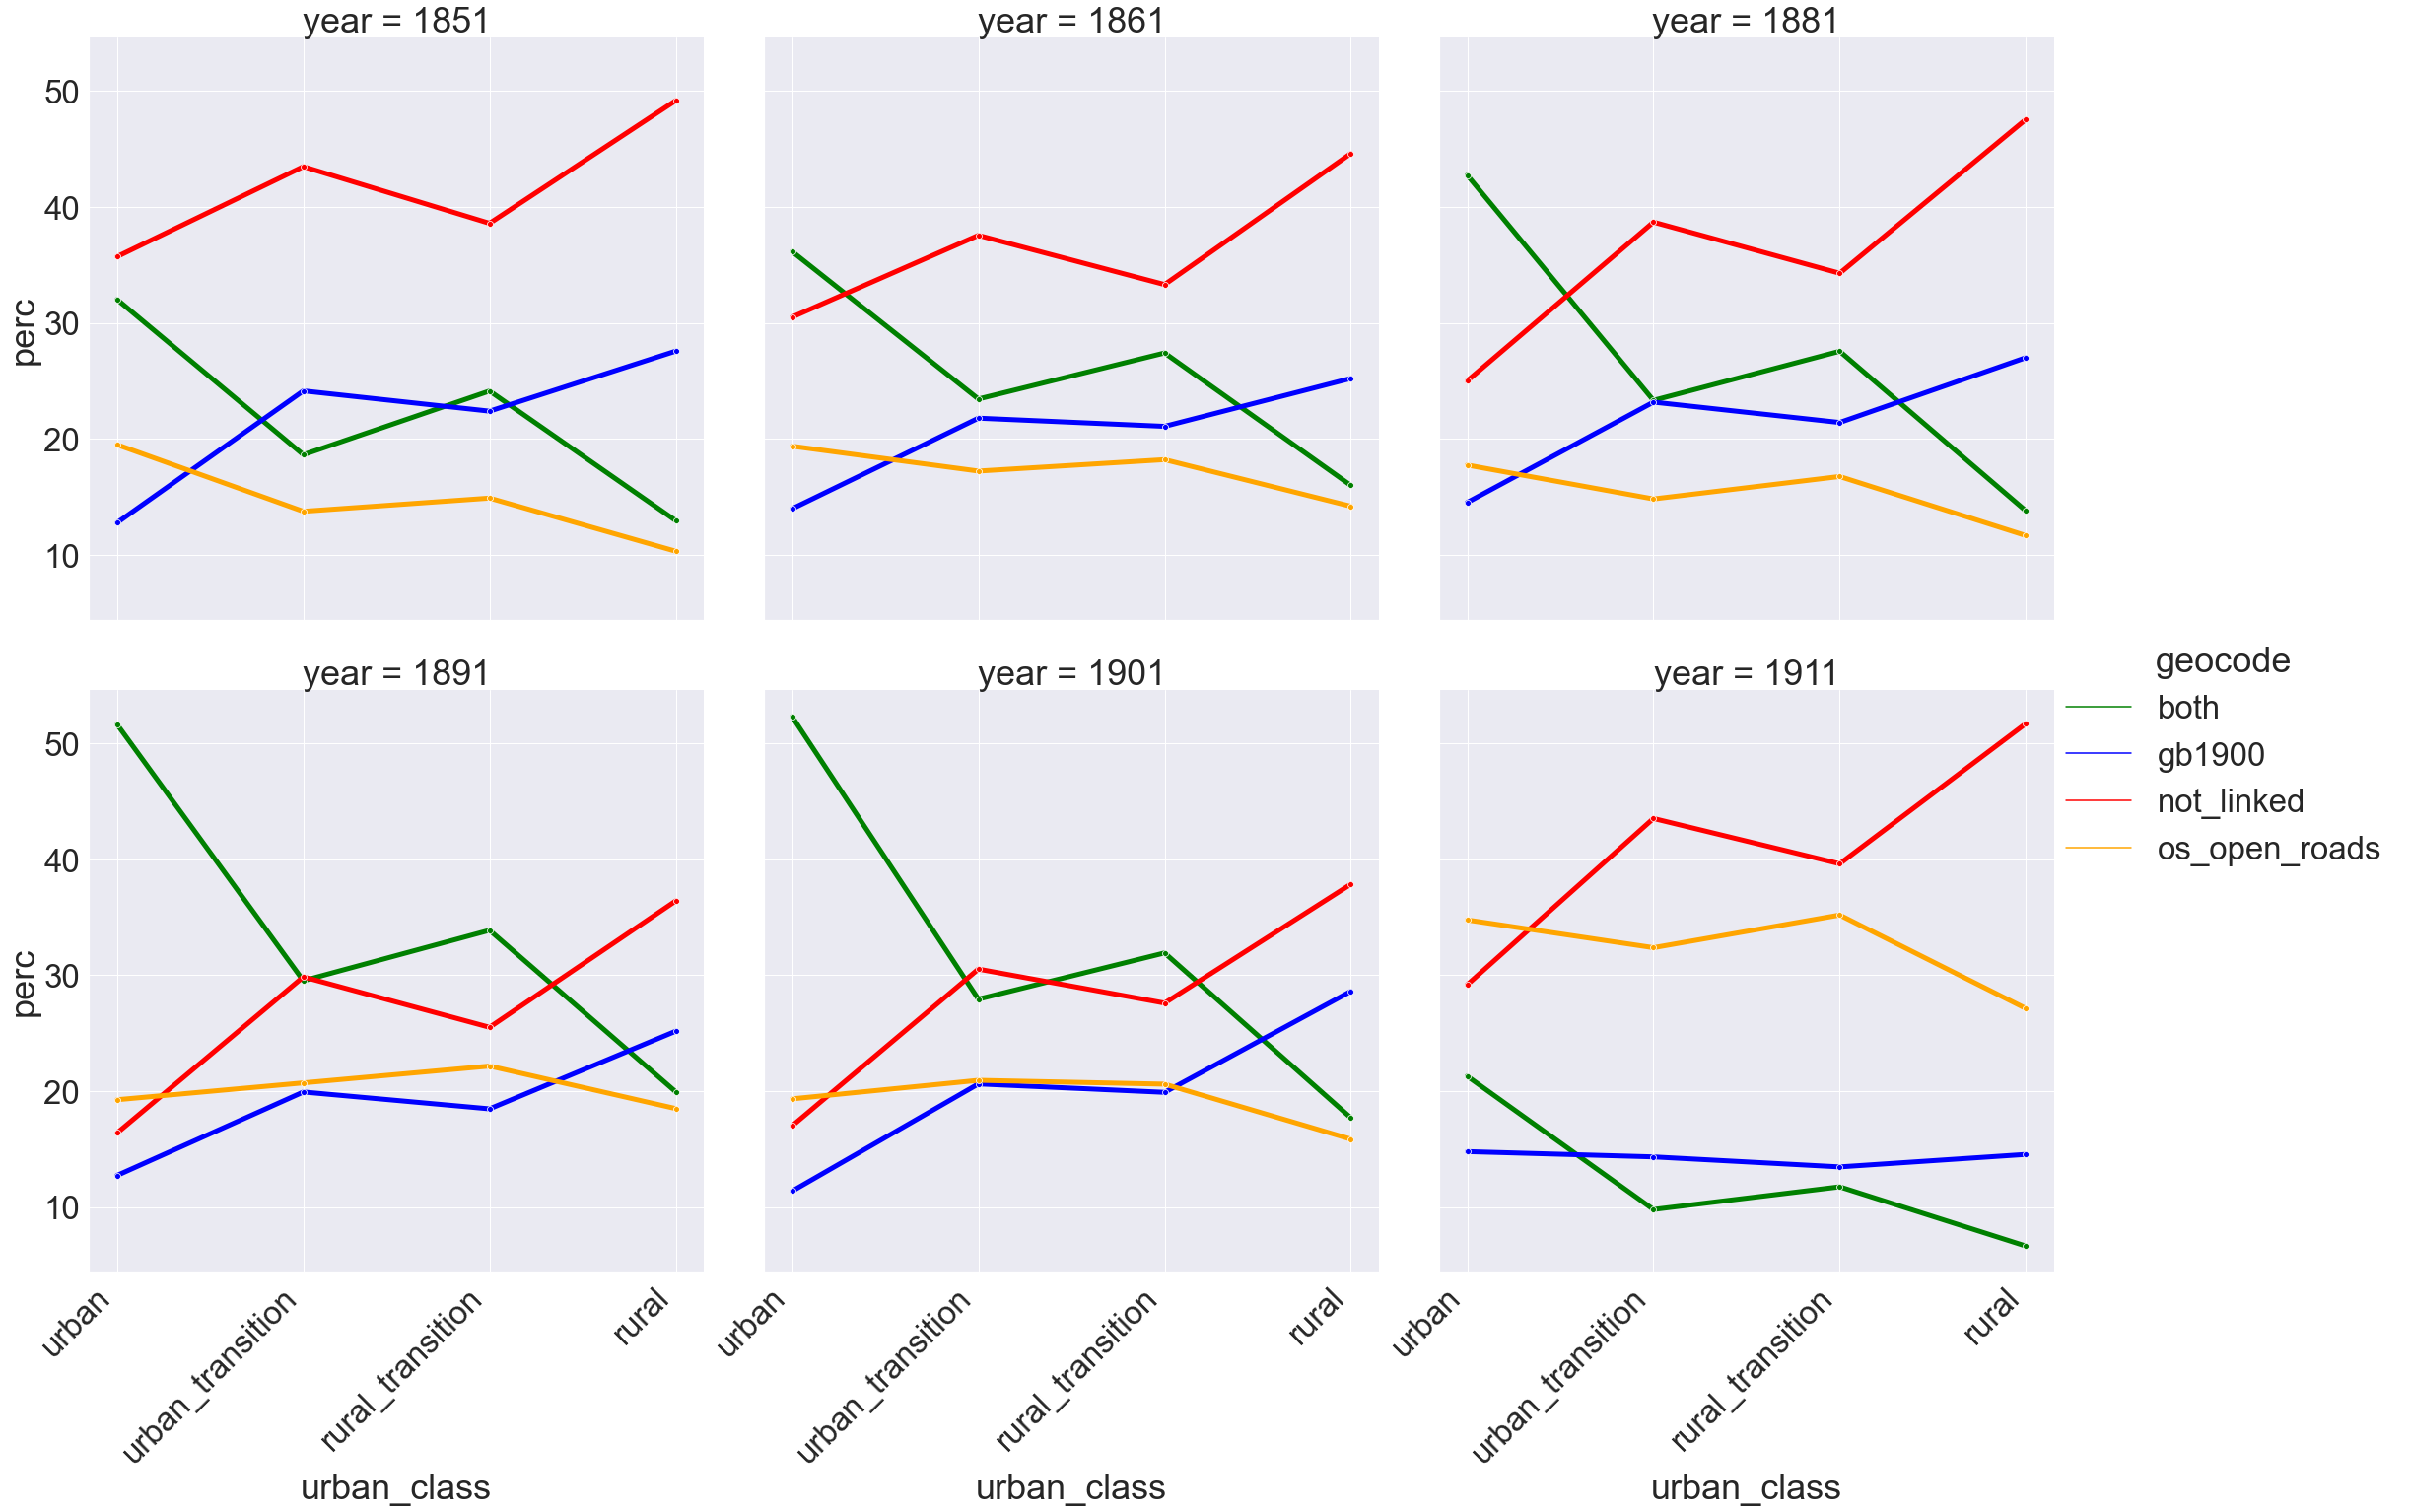

In [157]:
sns.set(font_scale = 3)
g2 = sns.relplot(g_graph_geog, x="urban_class", y = "perc", hue="geocode", marker="o", palette=["green","blue","red","orange"],col="year", kind="line",height=10 , aspect=1, lw=5,col_wrap=3).set_xticklabels(rotation=45, horizontalalignment='right')
# g2.set_xticks([1851,1861,1871,1881,1891,1901,1911])
# g2.set_xticklabels([1851,1861,1871,1881,1891,1901,1911])
# sns.move_legend(g2, "upper left", bbox_to_anchor = (1,1))
# sns.displot(data=g_graph_geog, x="urban_class", hue="geocode", element= "step").set_xticklabels(rotation=45, horizontalalignment='right')

In [10]:
bbce_codes = pd.read_excel("/Users/jrhodes/Downloads/I-CeMOccode_1881EW_51EA_17EA_PST_SIC Final.xlsx", sheet_name="Sheet1", usecols=["OCCODE","17cat", "51cat"])

cat17 = dict(zip(bbce_codes["OCCODE"], bbce_codes["17cat"]))
# cat51 = dict(zip(bbce_codes["OCCODE"], bbce_codes["51cat"]))



geocode_census["17cat"] = geocode_census["Occode"].map(cat17)
# geocode_census["51cat"] = geocode_census["Occode"].map(cat51)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jrhodes/Downloads/I-CeMOccode_1881EW_51EA_17EA_PST_SIC Final.xlsx'

In [12]:
geocode_grouped_occ = geocode_census.groupby(["year", "geocode", "17cat"]).size()
g_graph_occ = (geocode_grouped_occ / geocode_grouped_occ.groupby(["year","geocode"]).transform("sum") * 100)
g_graph_occ = g_graph_occ.reset_index().rename(columns={0:"perc"})
g_graph_occ

,year,geocode,17cat,perc
0,1891,both,Agric produce processing & dealing,0.523907
1,1891,both,Construction,4.726737
2,1891,both,Domestic service,6.806244
3,1891,both,Farming/estate work,2.789107
4,1891,both,Finance & commerce,1.029937
...,...,...,...,...
131,1901,os_open_roads,"Public admin, military, clergy",1.432567
132,1901,os_open_roads,Refreshment,1.185902
133,1901,os_open_roads,Retail,2.846682
134,1901,os_open_roads,Transport,5.111339


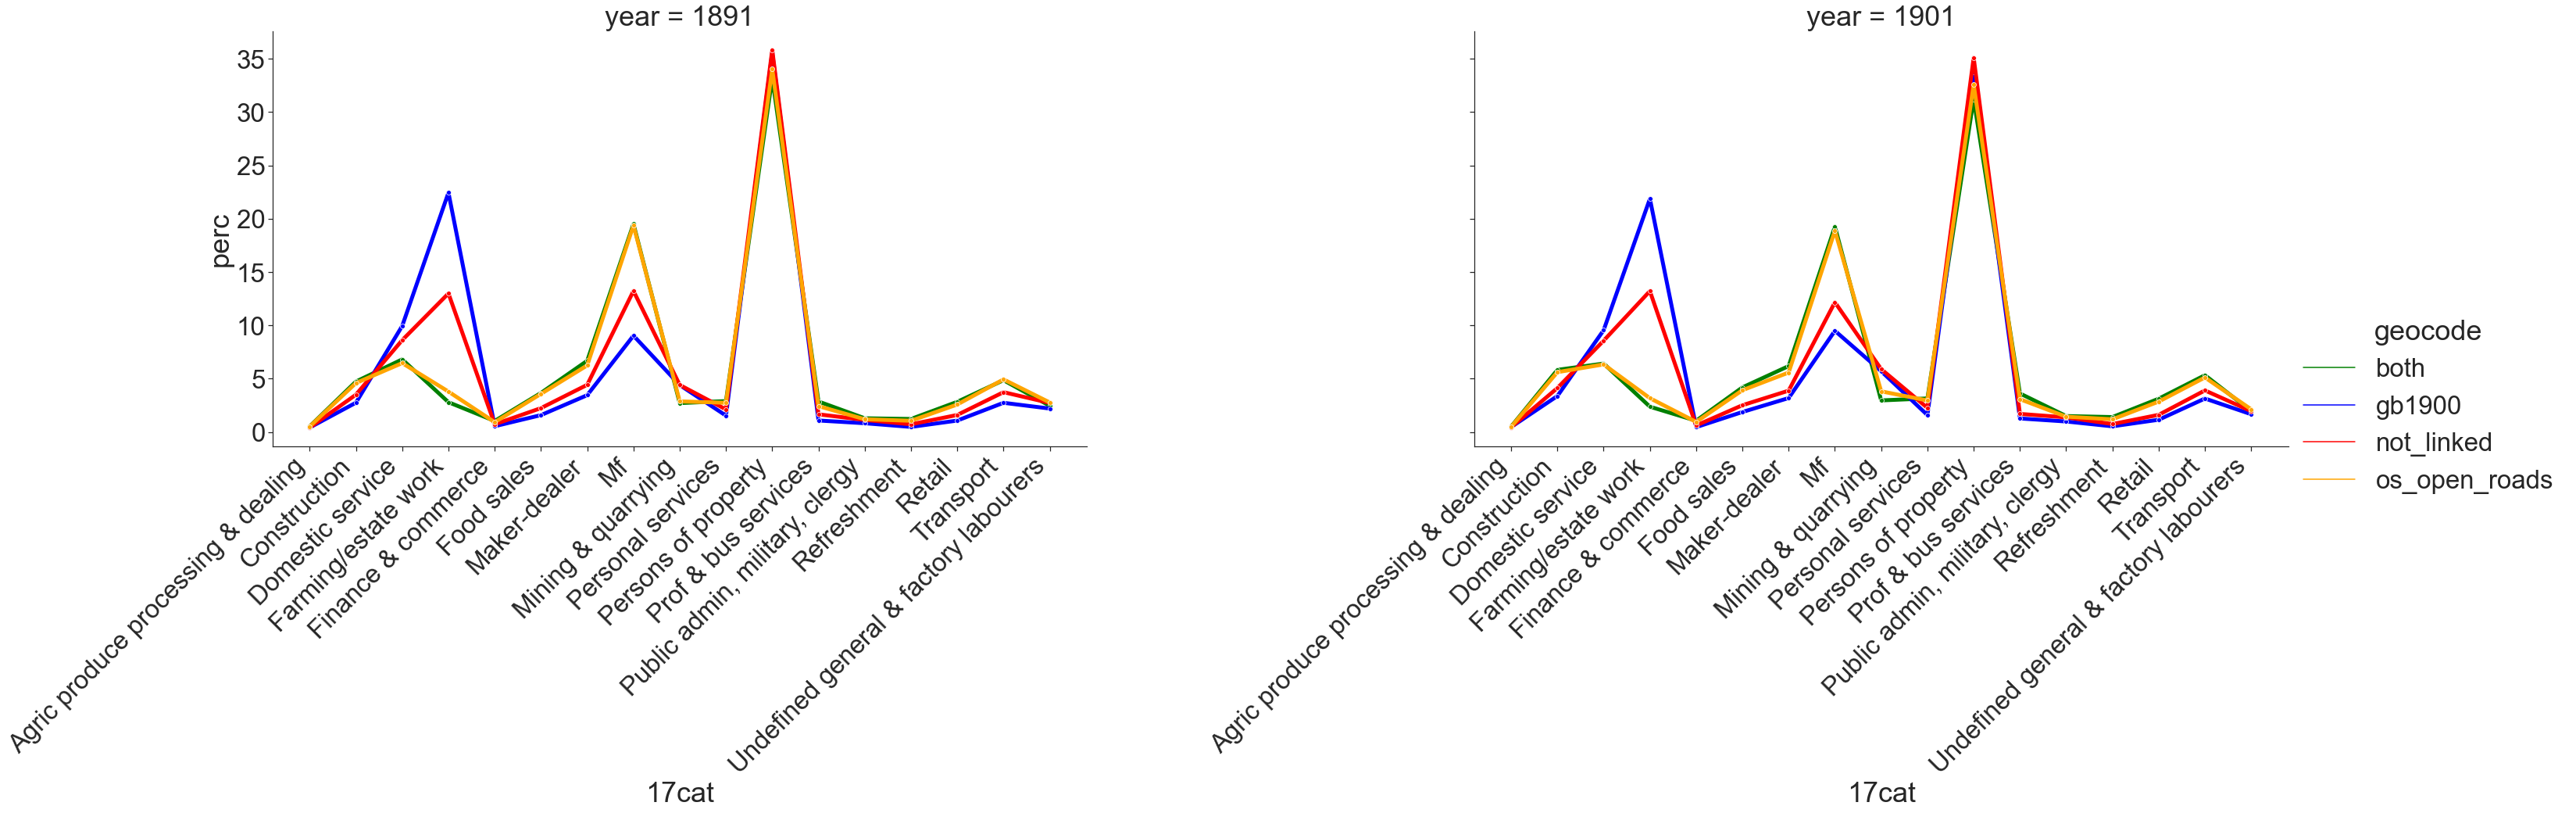

In [14]:
sns.set(font_scale = 3, style="ticks")
g3 = sns.relplot(g_graph_occ, x="17cat", y = "perc", hue="geocode", marker="o", palette=["green","blue","red","orange"],col="year", kind="line",height=10 , aspect=2, lw=5,col_wrap=2).set_xticklabels(rotation=45, horizontalalignment='right')

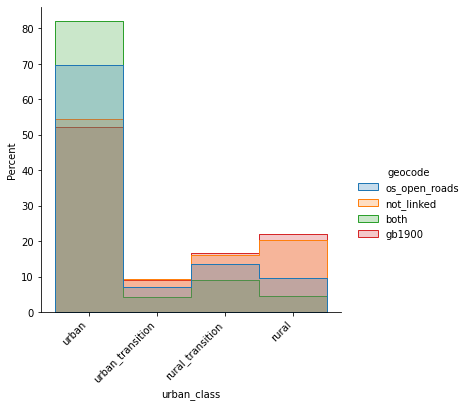

In [ ]:
sns.displot(data=geocode_census, x="urban_class", hue="geocode", element= "step", stat = "percent", common_norm = False).set_xticklabels(rotation=45, horizontalalignment='right')

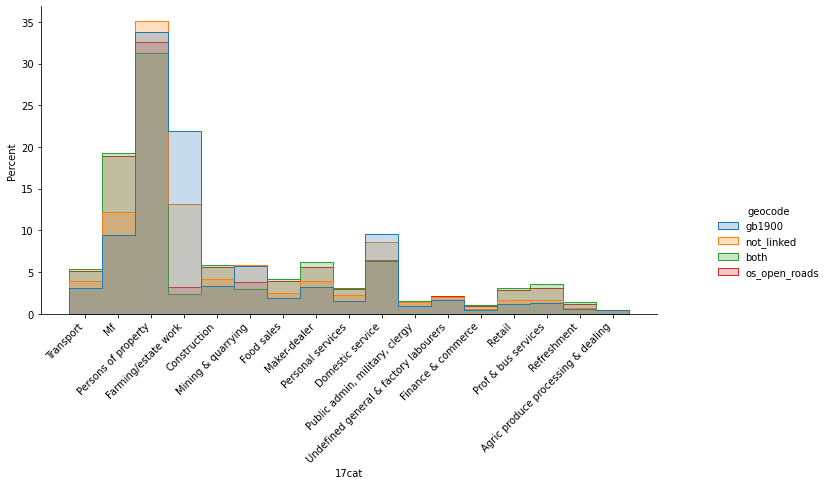

In [17]:
sns.displot(data=geocode_census, x="17cat", hue="geocode", element= "step", stat = "percent", height = 5, aspect = 2,common_norm = False).set_xticklabels(rotation=45, horizontalalignment='right')